In [1]:
import sys
import os
import numpy as np
import matplotlib as mplt
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FFMpegFileWriter
import pandas as pd

Dada una trayectoria, filtrar las trayectorias para obtener las trayectorias que pasan sobre 2 puntos especificos, se obtienen las trayectorias y se hace un df a partir de estas

In [2]:
def approx(x,val,epsilon):
    if x > val - epsilon and x < val + epsilon:
        return True
    else:
        return False

Choosing Data

In [3]:
name = "trj_wrapt_no_field.csv"
file_path = "C:\\Users\\emino\\OneDrive\\Desktop\\MagColloids\\MBR_01092024\\MBR_01092024\\TrayectoriesMBR\\data\\" + name

if os.path.exists(file_path):
    print("File found!")
    trj = pd.read_csv(file_path, index_col='id')
else:
    print("File not found at:", file_path)

File found!


In [4]:
print(trj.index) #id is an index, so this should be the parameter we look for
print(type(trj))
#print(trj.index.get_level_values(0))
print(trj)

Index([   1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
       ...
       1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024],
      dtype='int64', name='id', length=1845248)
<class 'pandas.core.frame.DataFrame'>
       frame  id.1         x         y         z
id                                              
1          0     1 -70.22210 -70.22210  0.000000
1        333     1 -70.19610 -70.13400 -0.000368
1        666     1 -70.22820 -70.19400 -0.183070
1        999     1 -70.25740 -70.18660 -0.208716
1       1332     1 -70.21940 -70.27510 -0.265085
...      ...   ...       ...       ...       ...
1024  598401  1024  72.01088  71.61139 -0.599454
1024  598734  1024  72.04048  71.66269 -0.589022
1024  599067  1024  72.04289  71.68631 -0.545427
1024  599400  1024  72.00827  71.68230 -0.594082
1024  599733  1024  72.07568  71.71390 -0.592856

[1845248 rows x 5 columns]


All Trayectories

Text(0, 0.5, 'x $\\mu{}m$')

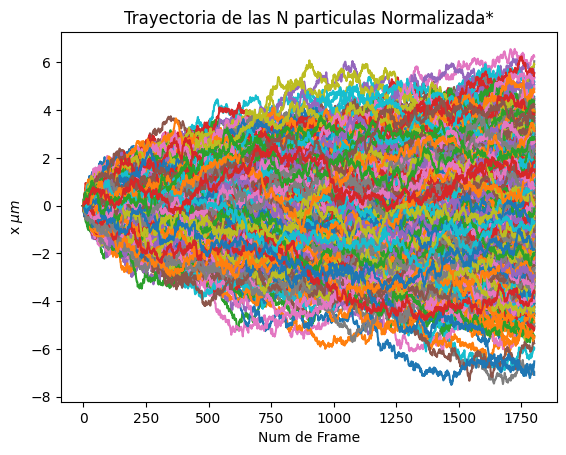

In [5]:
num_of_particles = trj.index.max()
n = trj.index.max()-1
for i in range(num_of_particles):
    #plt.plot(sims[i].index.get_level_values('frame'),sims[i].x)
    #print(len(sims[i].y.tolist()))
    trjpart = trj.loc[i+1]
    #print(trjpart)
    s = trjpart.x.tolist()
    d = s[0]
    #print(len(s))
    sn = [x - d for x in s]
    plt.plot(sn)
plt.title("Trayectoria de las N particulas Normalizada*")
plt.xlabel("Num de Frame")
plt.ylabel(r"x $\mu{}m$")

Filtering Data (Points Crossed)

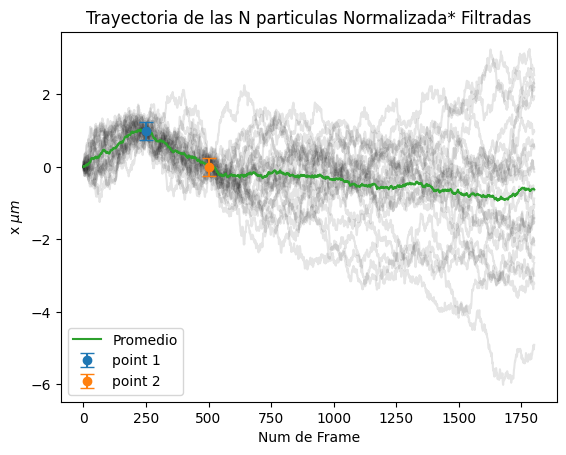

In [7]:
val1 = 1 #At frm1
val2 = 0 #At frm2
frm1 = 250
frm2 = 500
ep = 0.25 #epsilon

accepted_trays = []

for i in range(num_of_particles):
    #plt.plot(sims[i].index.get_level_values('frame'),sims[i].x)
    #print(len(sims[i].y.tolist()))
    #trjpart = trj[trj['id'] == i+1]
    trjpart = trj.loc[i+1] #Index
    #print(trjpart)
    s = trjpart.x.tolist()
    d = s[0]
    #print(len(s))
    sn = [x - d for x in s]
    if approx(sn[frm1], val1, ep) and approx(sn[frm2], val2, ep):
        accepted_trays.append(sn)
        plt.plot(sn, color = "k", alpha=0.1)
#Points in common **
#plt.plot([frm1], [val1], 'go', label="point 1")
#plt.plot([frm2], [val2], 'go', label="point 2")
plt.errorbar(frm1, val1, yerr=ep, fmt="o", capsize=5, label = "point 1")
plt.errorbar(frm2, val2, yerr=ep, fmt="o", capsize=5, label = "point 2")

mean_tray = [sum(values) / len(values) for values in zip(*accepted_trays)]
plt.plot(mean_tray, label='Promedio')

plt.title("Trayectoria de las N particulas Normalizada* Filtradas")
plt.xlabel("Num de Frame")
plt.ylabel(r"x $\mu{}m$")
plt.legend()